### Titanic

In [48]:
# Importaciones clasicas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import lazypredict

# Visualizacion de datos perdidos o NaN
import missingno as msngo

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

labelencoder = LabelEncoder()

# Tratamiento de warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Carga de sets de datos
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
data_submission = pd.read_csv('datasets/gender_submission.csv')

In [49]:
data_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [3]:
# Visualizacion de datos para entrenamiento
train_data.sample(5, random_state = 158)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
711,712,0,1,"Klaber, Mr. Herman",male,NaN,0,0,113028,26.5500,C124,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S


In [4]:
# Visualizacion de datos para testeo
test_data.sample(5, random_state = 158)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
229,1121,2,"Hocking, Mr. Samuel James Metcalfe",male,36.0,0,0,242963,13.0000,NaN,S
361,1253,2,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
161,1053,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C
25,917,3,"Robins, Mr. Alexander A",male,50.0,1,0,A/5. 3337,14.5000,NaN,S
159,1051,3,"Peacock, Mrs. Benjamin (Edith Nile)",female,26.0,0,2,SOTON/O.Q. 3101315,13.7750,NaN,S


In [5]:
# Tipos de datos
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Visualizaciond e columnas con datos nulos
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

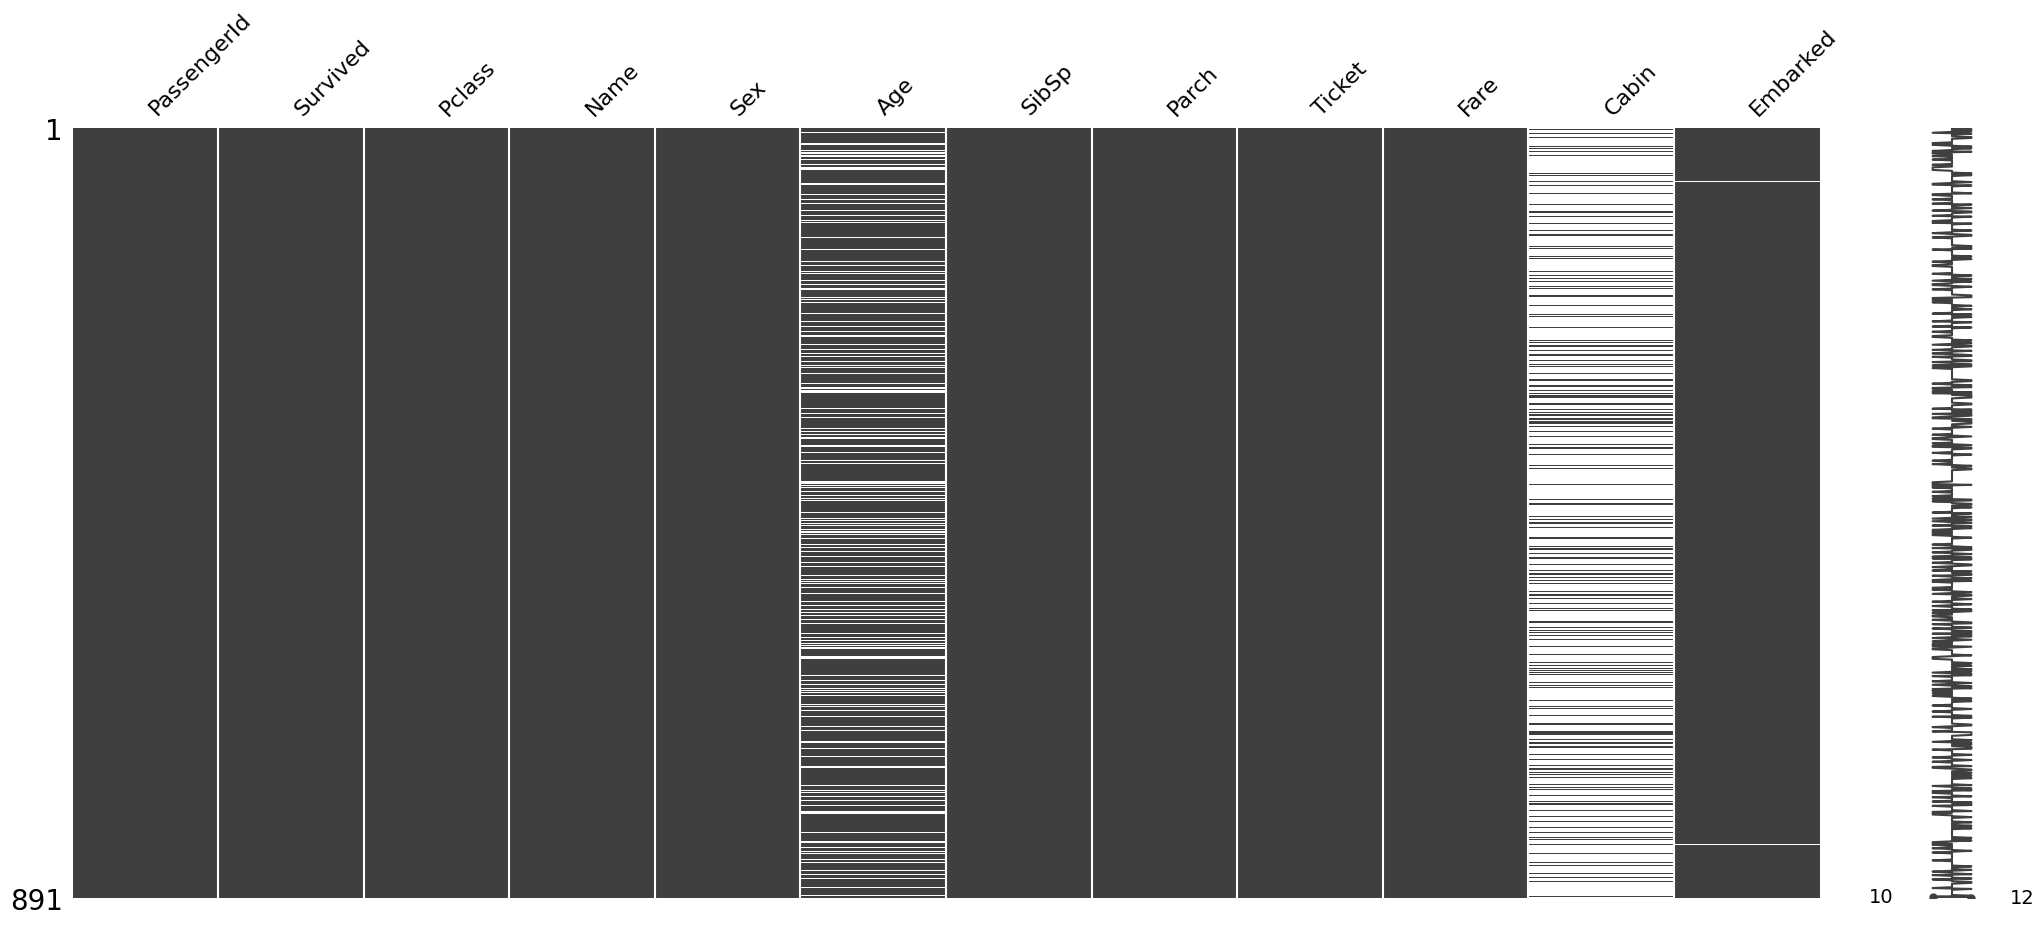

In [7]:
# Matris grafica de datos nulos
msngo.matrix(train_data)

<Axes: >

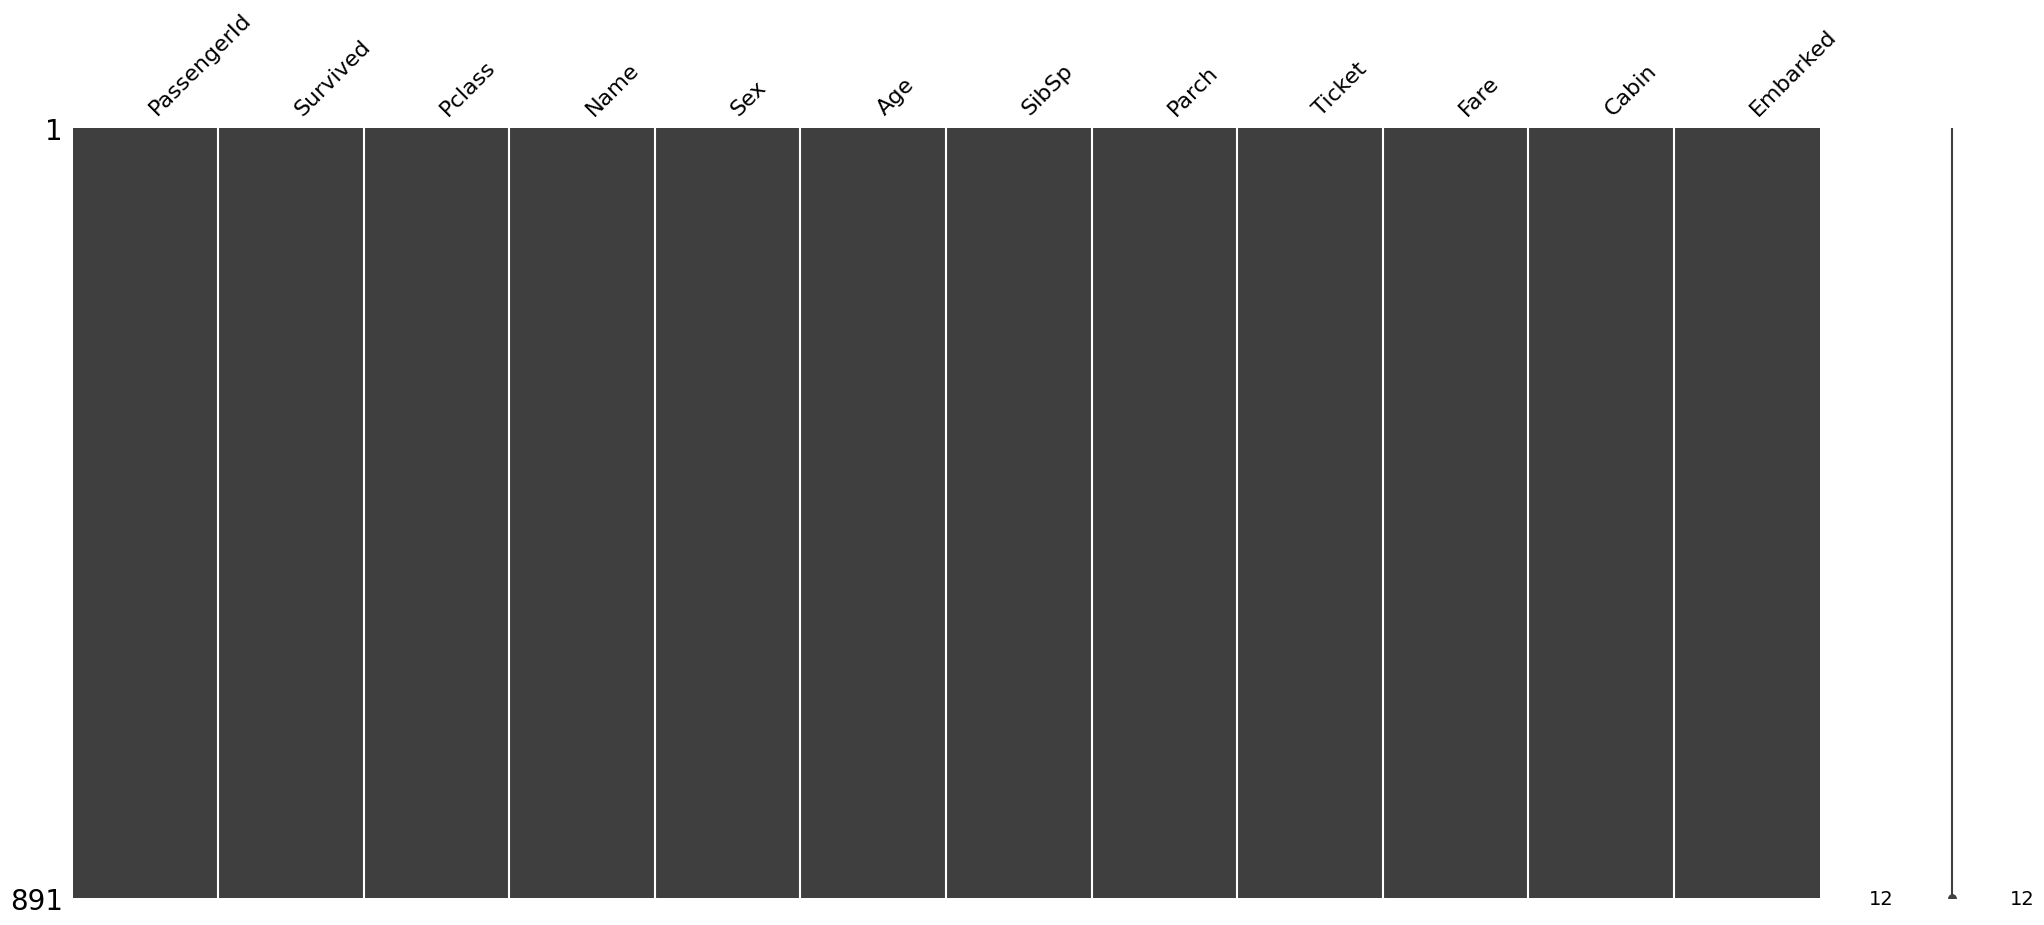

In [8]:
#Tratamiento de NaN, se transforman todos los NaN a 0
train_data["Age"] = train_data["Age"].fillna(0)
train_data["Cabin"] = train_data["Cabin"].fillna(0)
train_data["Embarked"] = train_data["Embarked"].fillna(0)
train_data["Fare"] = train_data["Fare"].fillna(0)


test_data["Age"] = test_data["Age"].fillna(0)
test_data["Cabin"] = test_data["Cabin"].fillna(0)
test_data["Embarked"] = test_data["Embarked"].fillna(0)
test_data["Fare"] = test_data["Fare"].fillna(0)

msngo.matrix(train_data)

<Axes: >

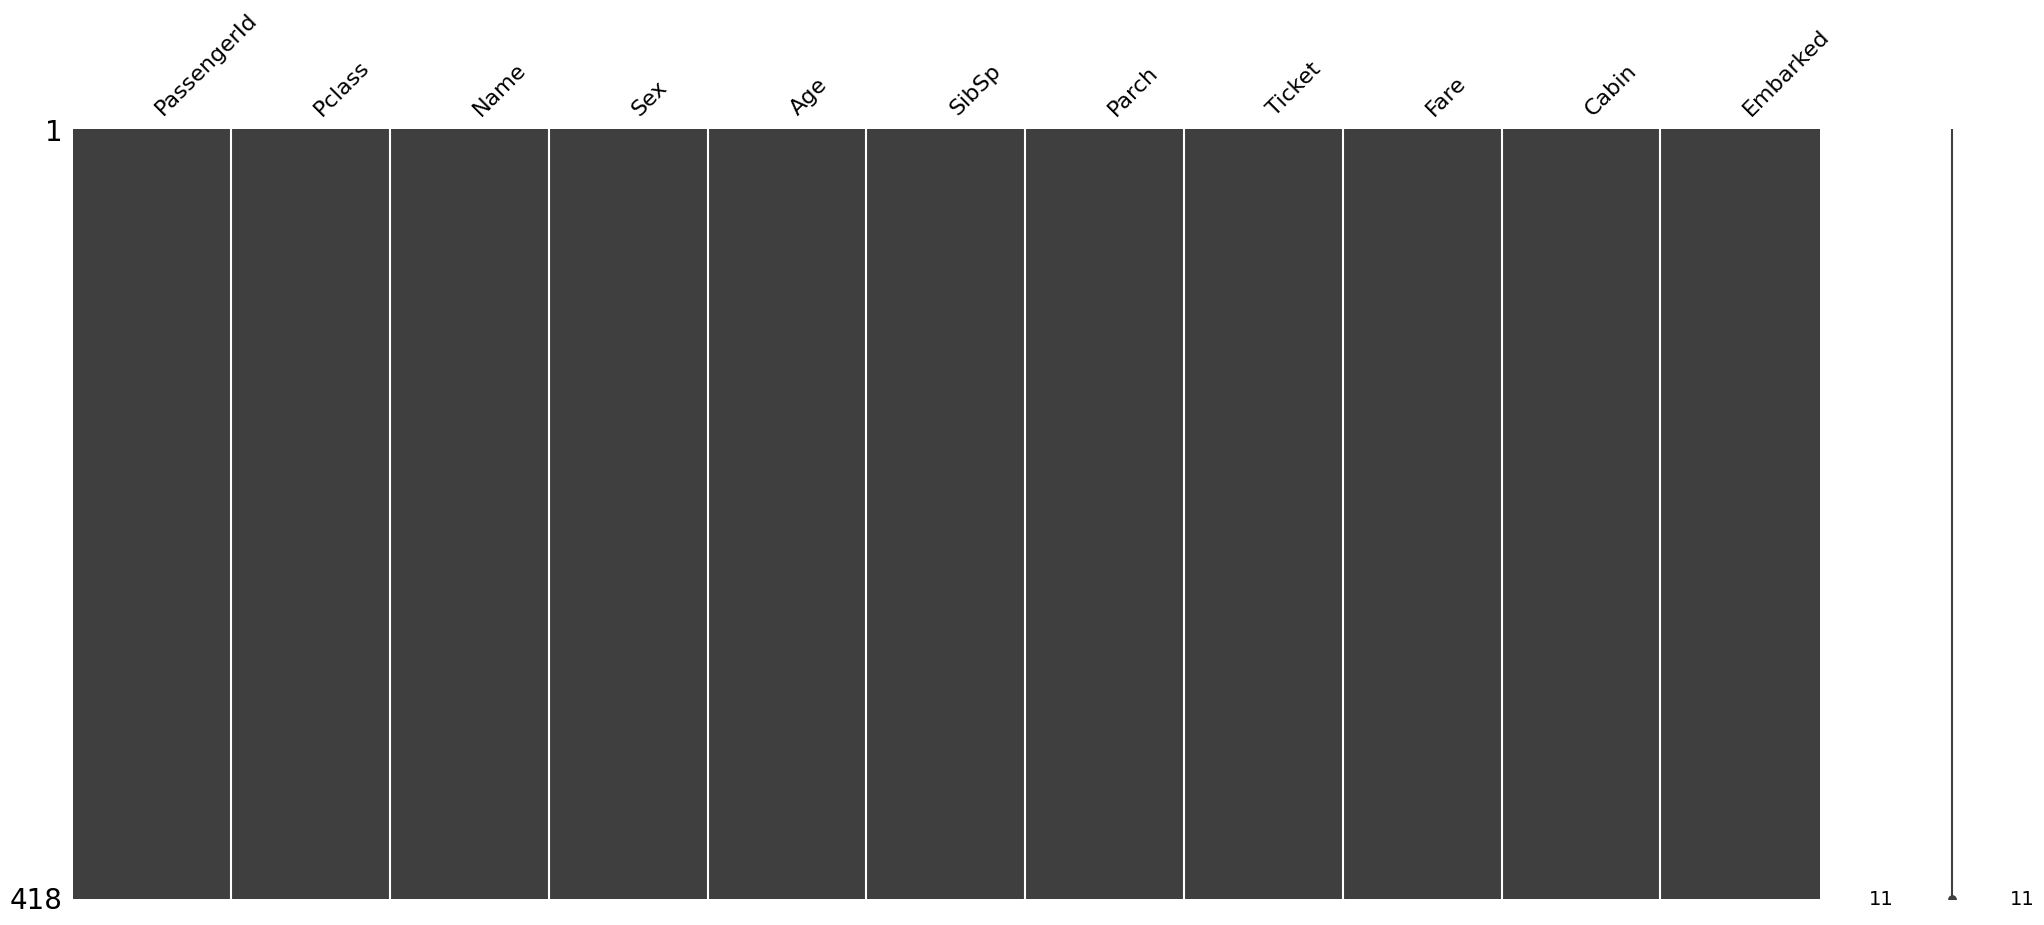

In [9]:
msngo.matrix(test_data)

In [10]:
# Visualizacion de dataset, se deben preparar dataset para modelamiento
train_data.sample(5, random_state = 158)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,0.0,0,0,35852,7.7333,0,Q
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,0,S
711,712,0,1,"Klaber, Mr. Herman",male,0.0,0,0,113028,26.5500,C124,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
419,420,0,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,0,S


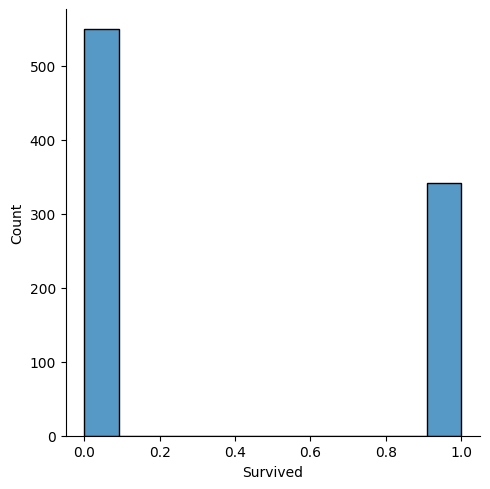

In [11]:
# Visualizacion de vector objetivo
sns.displot(data = train_data, x = "Survived")

<Axes: xlabel='Fare', ylabel='Count'>

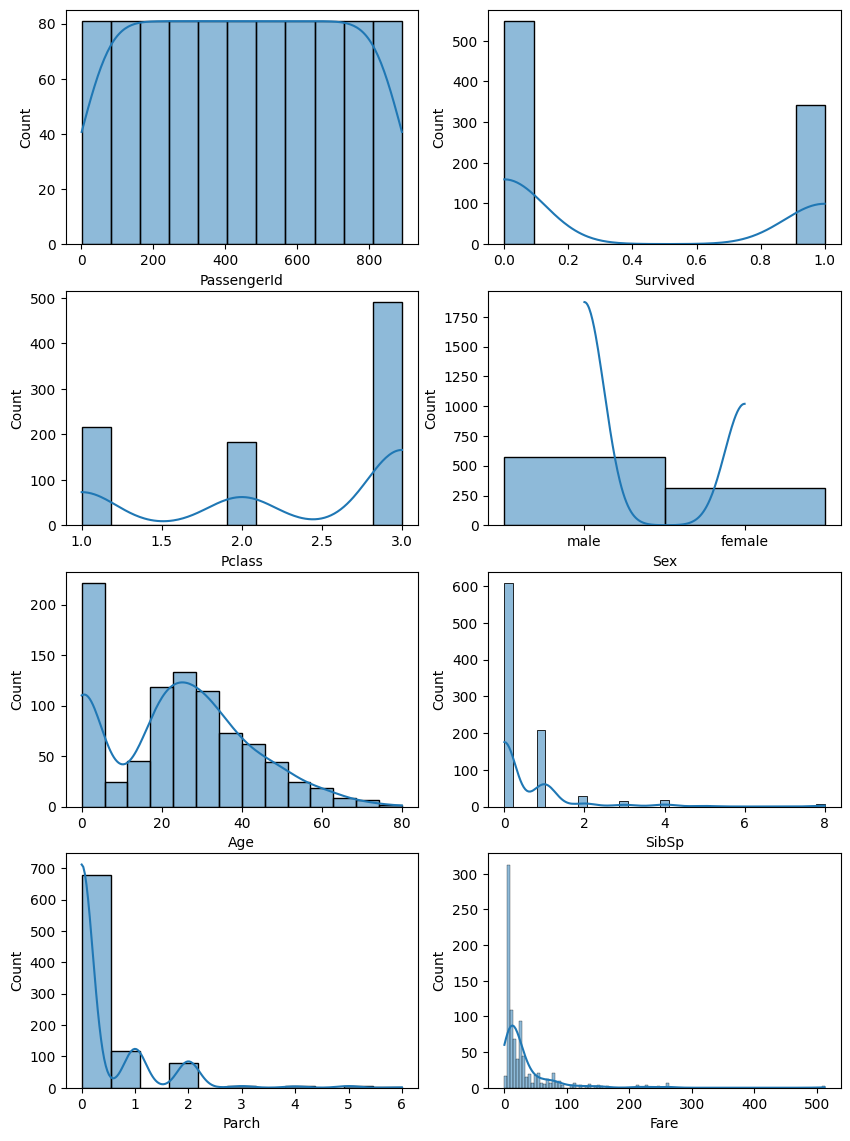

In [12]:

plt.rcParams["figure.figsize"] = (10,14)
#plt.axvline(x=train_data.PassengerId.mean(),color='red')
fig, axes = plt.subplots(4, 2)
sns.histplot(data = train_data, x = 'PassengerId', ax = axes[0,0], kde = True)
sns.histplot(data = train_data, x = 'Survived', ax = axes[0,1], kde = True)
sns.histplot(data = train_data, x = 'Pclass', ax = axes[1,0], kde = True)
sns.histplot(data = train_data, x = 'Sex', ax = axes[1,1], kde = True)
sns.histplot(data = train_data, x = 'Age', ax = axes[2,0], kde = True)
sns.histplot(data = train_data, x = 'SibSp', ax = axes[2,1], kde = True)
sns.histplot(data = train_data, x = 'Parch', ax = axes[3,0], kde = True)
sns.histplot(data = train_data, x = 'Fare', ax = axes[3,1], kde = True)

<Axes: xlabel='Sex', ylabel='Survived'>

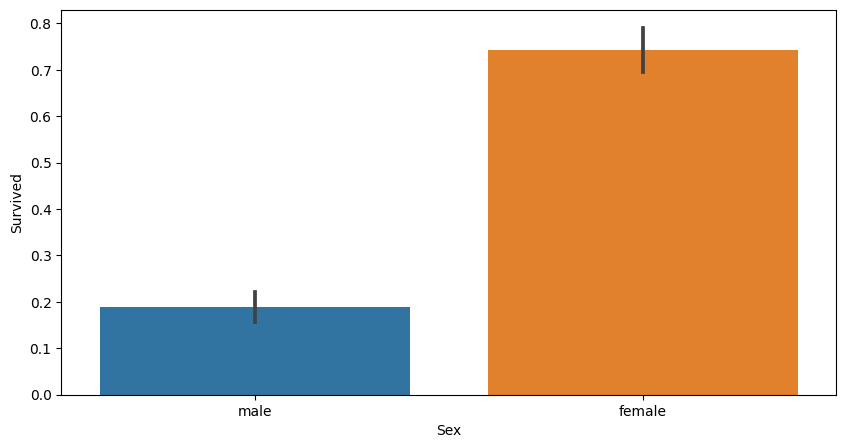

In [13]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Sex',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Pclass', ylabel='Survived'>

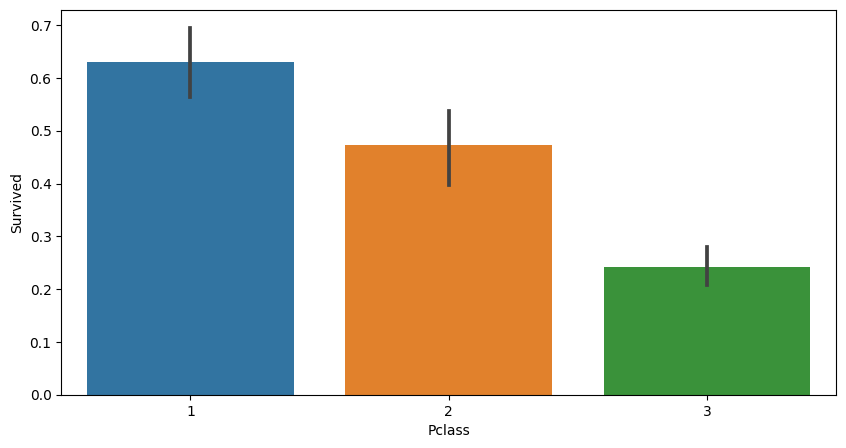

In [14]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Pclass',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Embarked', ylabel='Survived'>

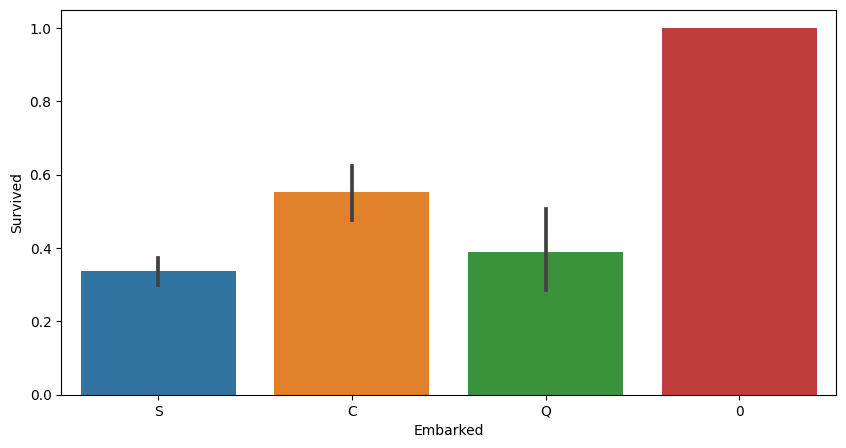

In [15]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Embarked',
    y = 'Survived',
    data = train_data
)

<Axes: xlabel='Survived', ylabel='Age'>

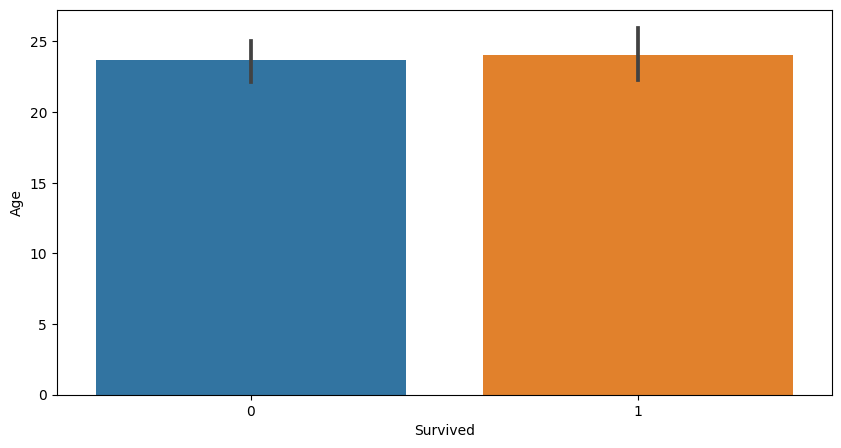

In [16]:
plt.rcParams["figure.figsize"] = (10,5)
sns.barplot(
    x = 'Survived',
    y = 'Age',
    data = train_data
)

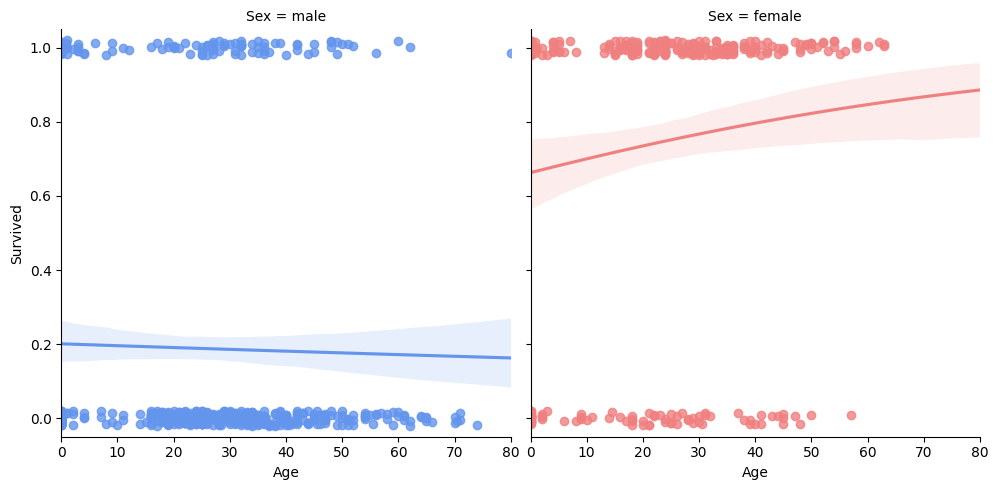

In [17]:

pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="Age", y="Survived", col="Sex", hue="Sex", data=train_data,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))


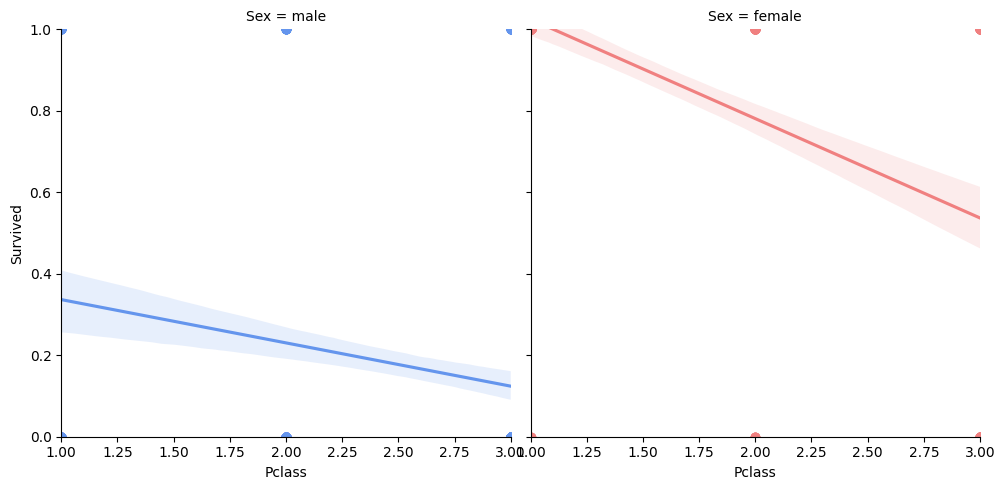

In [18]:
pal = dict(male="#6495ED", female="#F08080")

g = sns.lmplot(x="Pclass", y="Survived", col="Sex", hue="Sex", data=train_data,
               palette=pal)
g.set(xlim=(1, 3), ylim=(0, 1))

La probabilidad de sobrevivencia para los hombres en primera clase esta cercana al 35%, de segunda clase sobrepasa el 20% y para la tercera clase es inferior al 20%.
Con respecto al sexo feminino, la probabiida de supervivencia en la primera clase es cercana al 100%, la segunda clase cercana al 80% y la tercera clase cercana al 60%.
Podemos concluir que la probabilidad mas baja de sobrevivencia en las mujeres, es superior al mejor caso de probabilidad de los hombres.


PROCESAMIENTO DE DATOS DE DATASET - ENTRAMIENTO Y TESTING

In [19]:
# Binarización de varible categoria Sex en Train y Test
train_data['Sex'].replace(['female','male'],[0,1],inplace=True)
test_data['Sex'].replace(['female','male'],[0,1],inplace=True)

In [20]:
#Cambio los datos de embarque en números
train_data['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
test_data['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

In [21]:
#Elimino las columnas que considero que no son necesarias para el analisis
train_data = train_data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
test_data = test_data.drop(['Name','Ticket','PassengerId','Cabin'], axis=1)

In [22]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1
887,1,1,0,19.0,0,0,30.0000,1
888,0,3,0,0.0,1,2,23.4500,1
889,1,1,1,26.0,0,0,30.0000,2


In [23]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,1
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,1
4,3,0,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,1
414,1,0,39.0,0,0,108.9000,2
415,3,1,38.5,0,0,7.2500,1
416,3,1,0.0,0,0,8.0500,1


In [24]:
#Separo la columna con la información de los sobrevivientes

X_train = train_data.drop(columns = 'Survived')
y_train = train_data['Survived']

In [25]:
##Regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(test_data)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, y_train))

Precisión Regresión Logística:
0.7934904601571269


In [27]:
##Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(test_data)
print('Precisión Soporte de Vectores:')
print(svc.score(X_train, y_train))

Precisión Soporte de Vectores:
0.6868686868686869


In [28]:
##K neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(test_data)
print('Precisión Vecinos más Cercanos:')
print(knn.score(X_train, y_train))

Precisión Vecinos más Cercanos:
0.8383838383838383


In [47]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])
print(clf.predict([[-0.8, -1]]))

NameError: name 'Pipeline' is not defined